### Imports

In [122]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder



from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
import sklearn
sklearn.__version__

'1.5.2'

In [21]:
RAW_DATA_DIR = "data"
DATASET_PATH = f"data/bank/bank-full.csv"

In [22]:
!ls -lh
#!rm bank+marketing.zip bank+marketing.zip.1

total 1,2M
-rw-rw-r-- 1 aztleclan aztleclan 1000K oct 14 12:22 bank+marketing.zip
drwxrwxr-x 6 aztleclan aztleclan  4,0K oct 13 18:09 data
-rw-rw-r-- 1 aztleclan aztleclan  156K oct 14 12:22 Homework.ipynb
-rw-rw-r-- 1 aztleclan aztleclan  4,0K oct 13 17:54 homework.md


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

In [19]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 12:20:07--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [     <=>            ] 999,85K  1012KB/s    in 1,0s    

2024-10-14 12:20:08 (1012 KB/s) - ‘bank+marketing.zip’ saved [1023843]



We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 


In [9]:
!unzip bank+marketing.zip -d data

Archive:  bank+marketing.zip
 extracting: data/bank.zip           
 extracting: data/bank-additional.zip  


In [18]:
!unzip data/bank.zip -d data/bank

Archive:  data/bank.zip
  inflating: data/bank/bank-full.csv  
  inflating: data/bank/bank-names.txt  
  inflating: data/bank/bank.csv      


In [14]:
!unzip data/bank-additional.zip -d data

Archive:  data/bank-additional.zip
   creating: data/bank-additional/
  inflating: data/bank-additional/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/bank-additional/
  inflating: data/__MACOSX/bank-additional/._.DS_Store  
  inflating: data/bank-additional/.Rhistory  
  inflating: data/bank-additional/bank-additional-full.csv  
  inflating: data/bank-additional/bank-additional-names.txt  
  inflating: data/bank-additional/bank-additional.csv  
  inflating: data/__MACOSX/._bank-additional  


In [13]:
!ls -lh data

total 5,9M
-rwx------ 1 aztleclan aztleclan 435K may 22  2023 bank-additional.zip
-rw-r--r-- 1 aztleclan aztleclan 451K feb 14  2012 bank.csv
-rw-r--r-- 1 aztleclan aztleclan 4,4M feb 14  2012 bank-full.csv
-rw-r--r-- 1 aztleclan aztleclan 3,8K feb 14  2012 bank-names.txt
-rwx------ 1 aztleclan aztleclan 566K may 22  2023 bank.zip


### Features



For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`


### Data preparation



* Select only the features from above.
* Check if the missing values are presented in the features.

In [44]:
df = pd.read_csv(DATASET_PATH, sep=";")

In [45]:
print(df.columns)
print(df.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
(45211, 17)


In [46]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Check if there are columns with Null

In [47]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Question 1

What is the most frequent observation (mode) for the column `education`?

In [48]:
df["education"].mode()

0    secondary
Name: education, dtype: object


- `unknown`
- `primary`
- **`secondary`** <strong style="font-size: 24px;">&larr;</strong>
- `tertiary`

### Question 2



Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [50]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

In [51]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [52]:
# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


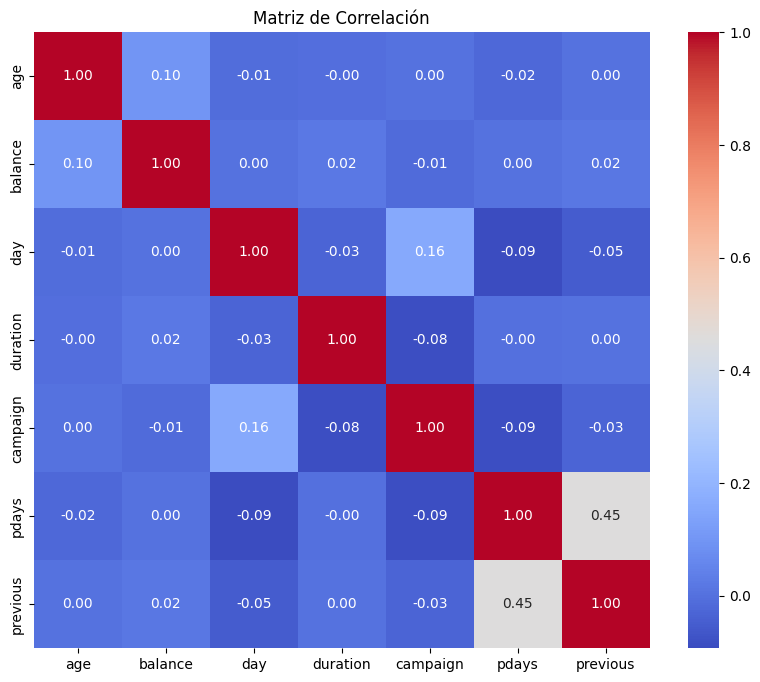

In [53]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

In [54]:
# Despejar la matriz (convertirla en un formato largo)
corr_pairs = correlation_matrix.unstack()

# Eliminar las correlaciones duplicadas y las que son 1 (correlación de una variable consigo misma)
filtered_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()

# Encontrar la pareja con la correlación máxima
most_correlated_pair = filtered_pairs.abs().idxmax()
max_correlation_value = filtered_pairs.max()

In [55]:
most_correlated_pair, max_correlation_value

(('pdays', 'previous'), 0.4548196354805043)

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- **`pdays` and `previous`**  <strong style="font-size: 24px;">&larr;</strong>

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [56]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [57]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [58]:
df.y = (df.y == 'yes').astype(int)

In [59]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [60]:
seed = 42

In [64]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [65]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [66]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Y
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

# Remove y
df_train = df_train.drop(columns=['y'])
df_val = df_val.drop(columns=['y'])
df_test = df_test.drop(columns=['y'])

In [67]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [68]:
print(f"df :{len(df)}, train :{len(df_train)} ({len(df_train)/len(df):.2f})%")
print(f"df :{len(df)}, val   :{len(df_val)} ({len(df_val)/len(df):.2f})%")
print(f"df :{len(df)}, test  :{len(df_test)} ({len(df_test)/len(df):.2f})%")

df :45211, train :27126 (0.60)%
df :45211, val   :9042 (0.20)%
df :45211, test  :9043 (0.20)%


### Question 3


* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`


In [101]:
df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,no,1100,yes,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,no,0,yes,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,no,3309,yes,no,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,no,2410,no,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,no,3220,no,no,cellular,26,aug,74,4,-1,0,unknown


In [110]:
categorical_columns = [
    "job",
    "marital", 
    "education", 
    "default",
    "housing",
    "loan", 
    "contact",
    "month",
    "poutcome"
]

In [111]:
def mutual_info_churn_score(series):
    #return mutual_info_score(series, df_full_train.y)
    return mutual_info_score(series, y_train)

#mi_scores = df_full_train[categorical_columns].apply(mutual_info_churn_score)
#mi_scores.sort_values(ascending=False)
mi_scores = df_train[categorical_columns].apply(mutual_info_churn_score)

In [112]:
mi_results = mi_scores.to_frame().reset_index()
mi_results.columns = columns=['Feature', 'Mutual Information']
mi_results['Round Mutual Information'] = mi_results['Mutual Information'].round(2)
mi_results = mi_results.sort_values(by='Round Mutual Information', ascending=False)
# Mostrar los resultados
print(mi_results)

     Feature  Mutual Information  Round Mutual Information
7      month            0.025090                      0.03
8   poutcome            0.029533                      0.03
0        job            0.007316                      0.01
4    housing            0.010343                      0.01
6    contact            0.013356                      0.01
1    marital            0.002050                      0.00
2  education            0.002697                      0.00
3    default            0.000293                      0.00
5       loan            0.002714                      0.00


- `contact`
- `education`
- `housing`
- **`poutcome`** <strong style="font-size: 24px;">&larr;</strong>


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [109]:
df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,no,1100,yes,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,no,0,yes,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,no,3309,yes,no,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,no,2410,no,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,no,3220,no,no,cellular,26,aug,74,4,-1,0,unknown


In [116]:
len(df_train.columns), len(numerical_columns), len(categorical_columns)

(16, 7, 9)

In [79]:
X_train_num = df_train[numerical_columns].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [80]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [81]:
X_train_cat = ohe.fit_transform(df_train[categorical_columns].values)

In [82]:
feature_names = ohe.get_feature_names_out()
feature_names

array(['x0_admin.', 'x0_blue-collar', 'x0_entrepreneur', 'x0_housemaid',
       'x0_management', 'x0_retired', 'x0_self-employed', 'x0_services',
       'x0_student', 'x0_technician', 'x0_unemployed', 'x0_unknown',
       'x1_divorced', 'x1_married', 'x1_single', 'x2_primary',
       'x2_secondary', 'x2_tertiary', 'x2_unknown', 'x3_no', 'x3_yes',
       'x4_no', 'x4_yes', 'x5_no', 'x5_yes', 'x6_cellular',
       'x6_telephone', 'x6_unknown', 'x7_apr', 'x7_aug', 'x7_dec',
       'x7_feb', 'x7_jan', 'x7_jul', 'x7_jun', 'x7_mar', 'x7_may',
       'x7_nov', 'x7_oct', 'x7_sep', 'x8_failure', 'x8_other',
       'x8_success', 'x8_unknown'], dtype=object)

In [83]:
X_train = np.column_stack([X_train_num, X_train_cat])

In [84]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [85]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [86]:
X_val_num = df_val[numerical_columns].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical_columns].values)

X_val = np.column_stack([X_val_num, X_val_cat])

In [88]:
y_pred = model.predict_proba(X_val)[:, 1]
score = accuracy_score(y_val, y_pred >= 0.5)
round(score, 2)

0.9

In [123]:
def predict_logisticRegression(
    X_train, y_train,
    X_val, y_val,
    numerical_features, categorical_features, 
    c=1.0,
    seed=42,
):
    # Crear un ColumnTransformer para preprocesar las características
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])
    # Entrenar modelo base con todas las características
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(
            solver='liblinear', C=c, max_iter=1000, random_state=seed))
    ])
    
    # Train model
    model.fit(X_train, y_train)

    # Preprocesar el conjunto de validación
    #y_val_pred = model.predict(X_val)
    #score = accuracy_score(y_val, y_val_pred)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    score = accuracy_score(y_val, y_val_proba >= 0.5)
    return score


In [124]:
acc_score = predict_logisticRegression(
    df_train, y_train,
    df_val, y_val,
    numerical_columns, 
    categorical_columns, 
)

In [125]:
round(acc_score, 2)

0.9

- 0.6
- 0.7
- 0.8
- **0.9** <strong style="font-size: 24px;">&larr;</strong>

### Question 5 



* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 




Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [126]:
categorical_columns, numerical_columns

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [144]:
base_accuracy = predict_logisticRegression(
    df_train, y_train,
    df_val, y_val,
    numerical_columns, 
    categorical_columns, 
)

# Almacenar resultados
feature_importance = []

# Eliminar características una a una
for feature in df_train.columns:
    numerical_features_temp = [col for col in numerical_columns if feature != col]
    categorical_features_temp = [col for col in categorical_columns if feature != col]
    
    # Crear nuevo conjunto de entrenamiento y validación excluyendo la característica
    features_temp = numerical_features_temp + categorical_features_temp
    X_train_temp = df_train[features_temp]
    X_val_temp = df_val[features_temp]
    
    # Predict
    temp_accuracy = predict_logisticRegression(
        X_train_temp, y_train,
        X_val_temp, y_val,
        numerical_features_temp, 
        categorical_features_temp
    )
    
    # Calcular la diferencia
    accuracy_diff = base_accuracy - temp_accuracy
    print(f"feature: {feature} accuracy_diff: {base_accuracy}-{temp_accuracy}={accuracy_diff}")
    #feature_importance[feature] = accuracy_diff
    feature_importance.append({
        'Feature': feature,
        'Accuracy Difference': accuracy_diff,
        'Abs Accuracy Difference': abs(accuracy_diff)
    })


feature: age accuracy_diff: 0.8998009289980093-0.8999115239991152=-0.00011059500110588427
feature: job accuracy_diff: 0.8998009289980093-0.9007962840079629=-0.0009953550099535136
feature: marital accuracy_diff: 0.8998009289980093-0.900575094005751=-0.000774165007741634
feature: education accuracy_diff: 0.8998009289980093-0.9000221190002212=-0.00022119000221187957
feature: default accuracy_diff: 0.8998009289980093-0.8996903339969033=0.0001105950011059953
feature: balance accuracy_diff: 0.8998009289980093-0.9002433090024331=-0.00044238000442375913
feature: housing accuracy_diff: 0.8998009289980093-0.9010174740101747=-0.0012165450121653931
feature: loan accuracy_diff: 0.8998009289980093-0.900464499004645=-0.0006635700066356387
feature: contact accuracy_diff: 0.8998009289980093-0.900464499004645=-0.0006635700066356387
feature: day accuracy_diff: 0.8998009289980093-0.8998009289980093=0.0
feature: month accuracy_diff: 0.8998009289980093-0.8989161689891617=0.0008847600088476293
feature: durat

In [145]:
# Convertir a DataFrame para mejor visualización
importance_df = pd.DataFrame.from_dict(feature_importance)
importance_df = importance_df.sort_values(by='Abs Accuracy Difference', ascending=False)

print(importance_df)

      Feature  Accuracy Difference  Abs Accuracy Difference
11   duration             0.010949                 0.010949
15   poutcome             0.005087                 0.005087
6     housing            -0.001217                 0.001217
1         job            -0.000995                 0.000995
10      month             0.000885                 0.000885
2     marital            -0.000774                 0.000774
7        loan            -0.000664                 0.000664
8     contact            -0.000664                 0.000664
5     balance            -0.000442                 0.000442
13      pdays            -0.000332                 0.000332
3   education            -0.000221                 0.000221
12   campaign            -0.000221                 0.000221
4     default             0.000111                 0.000111
0         age            -0.000111                 0.000111
9         day             0.000000                 0.000000
14   previous             0.000000      

- `age`
- `balance`
- `marital`
- **`previous`**  <strong style="font-size: 24px;">&larr;</strong>

> **Note**: The difference doesn't have to be positive.

### Question 6



* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

In [146]:
# Define params
c_params = [ 0.01, 0.1, 1, 10, 100 ]

c_accuracies = [] 

# Eliminar características una a una
for c in c_params:    
    # Calcualte acc
    temp_accuracy = predict_logisticRegression(
        df_train, y_train,
        df_val, y_val,
        numerical_columns, 
        categorical_columns,
        c=c
    )
    
    print(f"c: {c} accuracy: {temp_accuracy}")
    c_accuracies.append({
        'C': c,
        'Accuracy': temp_accuracy,
    })


c: 0.01 accuracy: 0.8980314089803141
c: 0.1 accuracy: 0.9001327140013271
c: 1 accuracy: 0.8998009289980093
c: 10 accuracy: 0.8996903339969033
c: 100 accuracy: 0.8996903339969033


In [147]:
# Convertir a DataFrame para mejor visualización
c_accuracies_df = pd.DataFrame.from_dict(c_accuracies)
c_accuracies_df['Round Accuracy'] = c_accuracies_df['Accuracy'].round(3)
c_accuracies_df = c_accuracies_df.sort_values(by='Round Accuracy', ascending=False)

print(c_accuracies_df)

        C  Accuracy  Round Accuracy
1    0.10  0.900133           0.900
2    1.00  0.899801           0.900
3   10.00  0.899690           0.900
4  100.00  0.899690           0.900
0    0.01  0.898031           0.898


- 0.01
- **0.1**  <strong style="font-size: 24px;">&larr;</strong>
- 1
- 10
- 100